#   Task 9

In [1]:
import os
import math
import scipy
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# From MatplotLib
import matplotlib.pyplot as plt

# From Scipy 
from scipy.stats import loguniform

# From Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, f1_score

# For SMOTE
from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("C:/Users/Asus/bmi.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [7]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
labels = ['Extremely Weak','Weak','Normal','Overweight','Obsesity','Extreme Obesity']

MAP={}
for e, i in enumerate(sorted(df["Index"].unique())):
    MAP[i]=labels[e]
    
df["Class"] = df["Index"].map(MAP)

display(df.head())

print(f"The Datset consists of {df.shape[1]} features & {df.shape[0]} samples.")

,Gender,Height,Weight,Index,Class
0,Male,174,96,4,Obsesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obsesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


The Datset consists of 5 features & 500 samples.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
 4   Class   500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


In [12]:
df.nunique().sort_values()

Gender      2
Index       6
Class       6
Height     60
Weight    110
dtype: int64

In [13]:
display(df.describe())

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


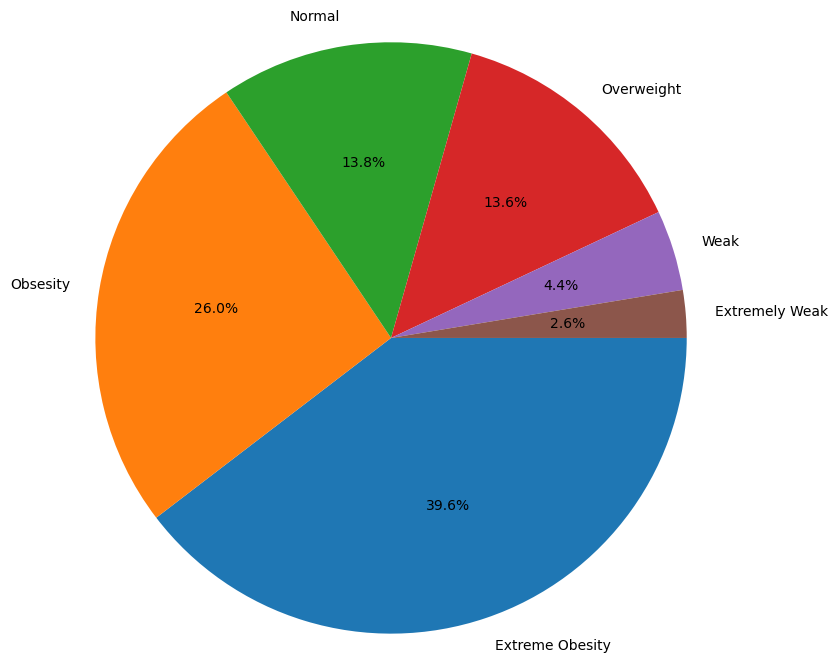

In [14]:
plt.pie(df["Index"].value_counts(), labels=df["Class"].value_counts().index, counterclock=False, autopct='%1.1f%%', radius=2)
plt.show()

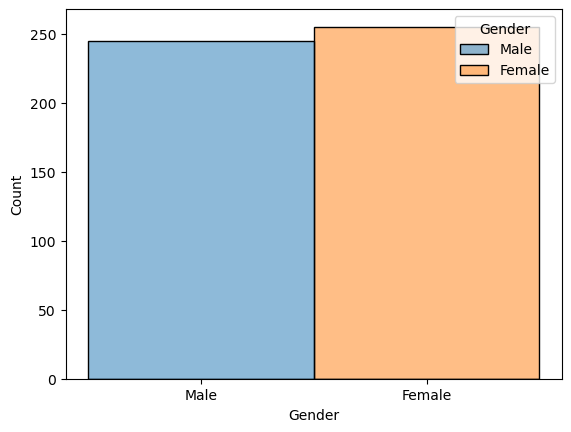

In [15]:
sns.histplot(data=df, x="Gender", hue="Gender")
plt.show()

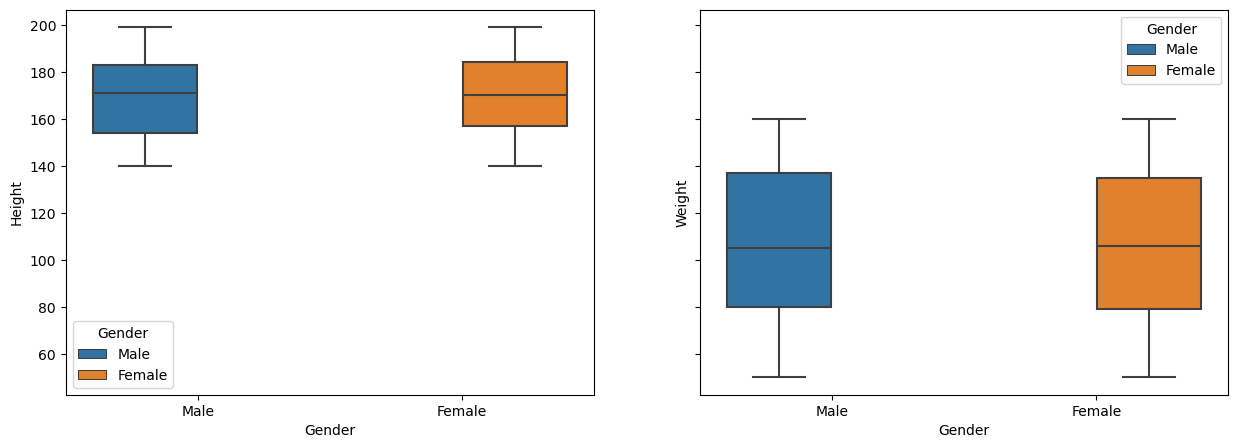

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data = df, hue="Gender", x = "Gender", y = "Height")

sns.boxplot(ax=axes[1], data = df, hue="Gender", x = "Gender", y = "Weight")

plt.show()

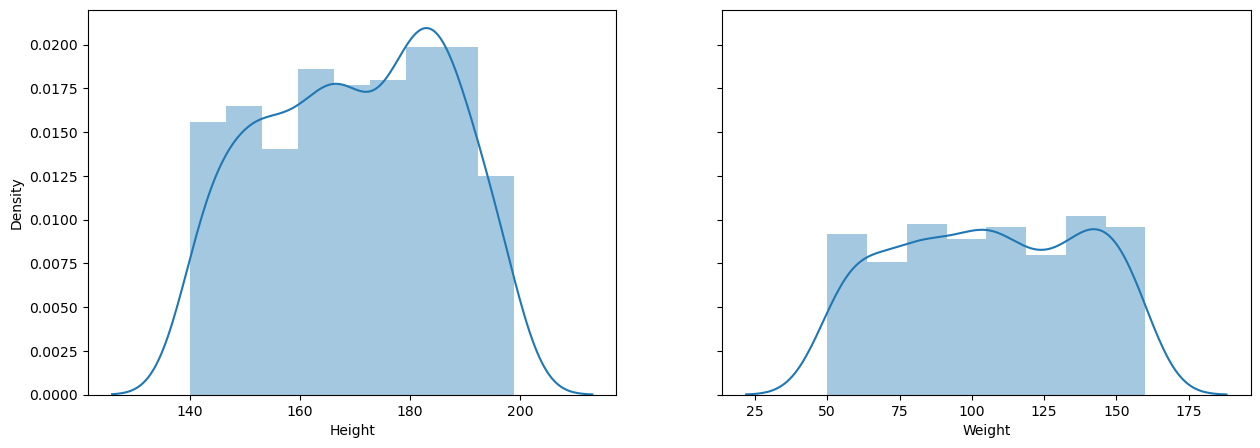

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.distplot(ax=axes[0], a=df["Height"])
sns.distplot(ax=axes[1], a=df["Weight"])

plt.show()

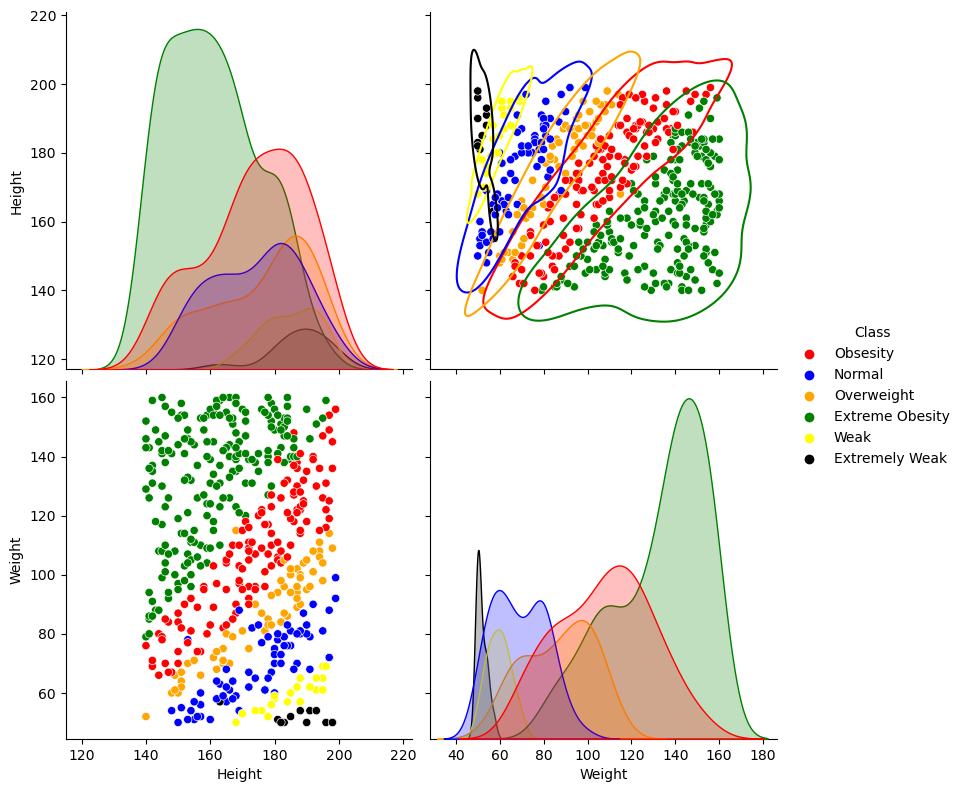

In [20]:
colors = ["red", "blue", "orange", "green", "yellow", "black"]
new_df = df.drop(labels=["Index"], axis=1)

pairplot = sns.pairplot(data=new_df, hue="Class", size=4, palette=colors)
pairplot.map_upper(sns.kdeplot, levels=1, color="1")

plt.show()

In [21]:
df = df.drop(labels=["Class"], axis=1)
df["Gender"] = np.where(df["Gender"] == "Male", 1, 0)

df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [22]:
X = df.drop(["Index"], axis=1)
Y = df["Index"]

In [23]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df = pd.DataFrame(X, columns=df.columns)
df["Index"] = Y

print('Class distribution after applying SMOTE Technique: ', Y.value_counts())

Class distribution after applying SMOTE Technique:  Index
4    198
2    198
3    198
5    198
1    198
0    198
Name: count, dtype: int64


In [24]:
X = df.drop(["Index"], axis=1)
Y = df["Index"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=7)

print('Original set  ---> ', X.shape, Y.shape,
      '\nTraining set  ---> ',x_train.shape, y_train.shape,
      '\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (1188, 3) (1188,) 
Training set  --->  (950, 3) (950,) 
Testing set   --->  (238, 3)  (238,)


In [25]:
scaler = StandardScaler()

print("\033[1m <-- Standardardization on Training set -->")
x_train_scale = scaler.fit_transform(x_train)
x_train_scale = pd.DataFrame(x_train_scale, columns=X.columns)
display(x_train_scale.head())

print("\033[1m <-- Standardardization on Testing set -->")
x_test_scale = scaler.transform(x_test)
x_test_scale = pd.DataFrame(x_test_scale, columns=X.columns)
display(x_test_scale.head())

 <-- Standardardization on Training set -->


,Gender,Height,Weight
0,1.277333,1.141102,-0.520619
1,-0.782881,-0.826910,-0.457755
2,-0.782881,1.272303,1.176729
3,1.277333,-1.220513,0.359487
4,-0.782881,1.272303,-1.054970


 <-- Standardardization on Testing set -->


,Gender,Height,Weight
0,1.277333,0.944301,-0.709214
1,1.277333,0.681899,-0.834943
2,-0.782881,-0.498908,-0.929240
3,-0.782881,1.206702,1.931106
4,-0.782881,0.222696,-0.960673


In [26]:

Evaluation_Results = pd.DataFrame(np.zeros((5,3)), columns=['Accuracy', 'Precision', 'F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)']
Evaluation_Results

,Accuracy,Precision,F1-score
Logistic Regression (LR),0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0


In [27]:
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 
    
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*2,'-'*15,Evaluation_Results.index[i], '-'*15,'>'*2))
    
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('Precision = {}%'.format(round(precision_score(y_test, pred, average='weighted'),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100))
    
    print('\n \033[1m <-- Confusiton Matrix --> \033[0m\n', confusion_matrix(y_test, pred))
    print('\n \033[1m <-- Classification Report -->\033[0m\n', classification_report(y_test, pred))

In [28]:
LR_model = LogisticRegression()

space = {'C': loguniform(1e-5, 100)}

RCV = RandomizedSearchCV(LR_model, space, n_iter=50)

LR = RCV.fit(x_train_scale, y_train).best_estimator_

pred = LR.predict(x_test_scale)
pred_prob = LR.predict_proba(x_test_scale)

Classification_Summary(pred, pred_prob, 0)

<<--------------- Evaluating Logistic Regression (LR) --------------->>

Accuracy = 89.9%
Precision = 90.7%
F1 Score = 89.9%

  <-- Confusiton Matrix --> 
 [[39  4  1  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  3 32  4  3  0]
 [ 0  0  1 31  2  0]
 [ 0  0  0  4 45  1]
 [ 0  0  0  0  1 34]]

  <-- Classification Report -->
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.82      1.00      0.90        33
           2       0.94      0.76      0.84        42
           3       0.79      0.91      0.85        34
           4       0.88      0.90      0.89        50
           5       0.97      0.97      0.97        35

    accuracy                           0.90       238
   macro avg       0.90      0.91      0.90       238
weighted avg       0.91      0.90      0.90       238



In [29]:
DT_model = DecisionTreeClassifier()

space = {"max_depth": [3, None], "criterion": ["entropy"]}

RCV = RandomizedSearchCV(DT_model, space, n_iter=50)

DT = RCV.fit(x_train_scale, y_train).best_estimator_

pred = DT.predict(x_test_scale)
pred_prob = DT.predict_proba(x_test_scale)

Classification_Summary(pred,pred_prob,1)

<<--------------- Evaluating Decision Tree Classifier (DT) --------------->>

Accuracy = 92.4%
Precision = 92.7%
F1 Score = 92.5%

  <-- Confusiton Matrix --> 
 [[41  2  1  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  0 38  1  3  0]
 [ 0  0  2 29  3  0]
 [ 0  0  1  0 46  3]
 [ 0  0  0  0  2 33]]

  <-- Classification Report -->
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.94      1.00      0.97        33
           2       0.90      0.90      0.90        42
           3       0.97      0.85      0.91        34
           4       0.85      0.92      0.88        50
           5       0.92      0.94      0.93        35

    accuracy                           0.92       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.92      0.92       238



In [31]:
RF_model = RandomForestClassifier()

space = {'bootstrap': [True, False], 'max_depth': [10, 20, 50, None], 'max_features': ['auto', 'sqrt']}

RCV = RandomizedSearchCV(RF_model, space, n_iter=50, scoring='f1_weighted')

RF = RCV.fit(x_train_scale, y_train).best_estimator_

pred = RF.predict(x_test_scale)
pred_prob = RF.predict_proba(x_test_scale)
Classification_Summary(pred, pred_prob, 2)

<<--------------- Evaluating Random Forest Classifier (RF) --------------->>

Accuracy = 92.9%
Precision = 93.10000000000001%
F1 Score = 92.9%

  <-- Confusiton Matrix --> 
 [[40  2  2  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  1 38  1  2  0]
 [ 0  0  2 31  1  0]
 [ 0  0  0  0 47  3]
 [ 0  0  0  0  3 32]]

  <-- Classification Report -->
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.92      1.00      0.96        33
           2       0.90      0.90      0.90        42
           3       0.97      0.91      0.94        34
           4       0.89      0.94      0.91        50
           5       0.91      0.91      0.91        35

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [32]:
SVM_model = SVC(probability=True).fit(x_train_scale, y_train)

param = {
     "C": [.01, .1, 1, 5, 10, 100],             
     "gamma": [.01, .1, 1, 5, 10, 100],
     "kernel": ["rbf"]
}

RCV = RandomizedSearchCV(SVM_model, param, n_iter=50)

SVM = RCV.fit(x_train_scale, y_train).best_estimator_

pred = SVM.predict(x_test_scale)
pred_prob = SVM.predict_proba(x_test_scale)

Classification_Summary(pred, pred_prob,3)

<<--------------- Evaluating Support Vector Machine (SVM) --------------->>

Accuracy = 92.4%
Precision = 92.80000000000001%
F1 Score = 92.4%

  <-- Confusiton Matrix --> 
 [[38  4  2  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  1 34  4  3  0]
 [ 0  0  1 32  1  0]
 [ 0  0  0  0 49  1]
 [ 0  0  0  0  1 34]]

  <-- Classification Report -->
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        44
           1       0.87      1.00      0.93        33
           2       0.92      0.81      0.86        42
           3       0.89      0.94      0.91        34
           4       0.91      0.98      0.94        50
           5       0.97      0.97      0.97        35

    accuracy                           0.92       238
   macro avg       0.93      0.93      0.92       238
weighted avg       0.93      0.92      0.92       238



In [33]:

KNN_model = KNeighborsClassifier()

space = {
    "n_neighbors": [i for i in range(1,30,5)], 
    "weights": ["uniform", "distance"], 
    "algorithm": ["ball_tree", "kd_tree", "brute"]
}

RCV = RandomizedSearchCV(KNN_model, space, n_iter=50)

KNN = RCV.fit(x_train_scale, y_train).best_estimator_

pred = KNN.predict(x_test_scale)
pred_prob = KNN.predict_proba(x_test_scale)

Classification_Summary(pred, pred_prob, 4)

<<--------------- Evaluating K Nearest Neighbours (KNN) --------------->>

Accuracy = 92.0%
Precision = 92.4%
F1 Score = 92.0%

  <-- Confusiton Matrix --> 
 [[39  4  1  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  1 38  2  1  0]
 [ 0  0  1 30  3  0]
 [ 0  0  0  0 47  3]
 [ 0  0  0  0  3 32]]

  <-- Classification Report -->
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.87      1.00      0.93        33
           2       0.95      0.90      0.93        42
           3       0.94      0.88      0.91        34
           4       0.87      0.94      0.90        50
           5       0.91      0.91      0.91        35

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



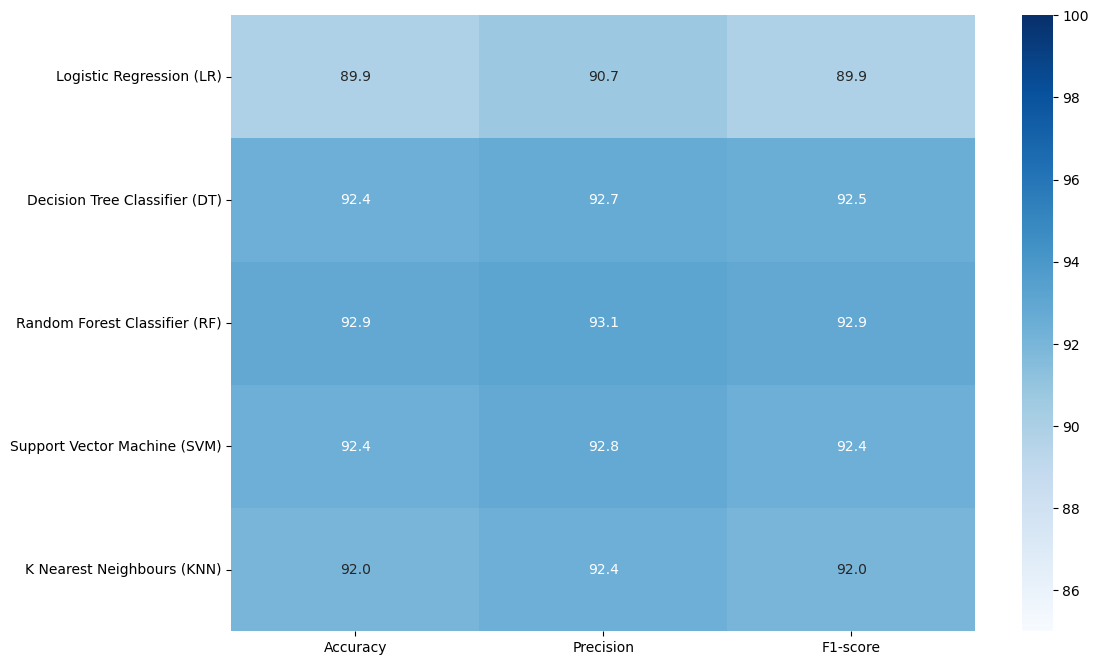

In [34]:
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='Blues', fmt='.1f')

plt.show()